In [2]:
!pip install einops

  Using cached einops-0.7.0-py3-none-any.whl.metadata (13 kB)
Using cached einops-0.7.0-py3-none-any.whl (44 kB)


In [2]:
import numpy as np
from einops_master.docs.utils import display_np_arrays_as_images

In [6]:
display_np_arrays_as_images()

In [7]:
ims = np.load('einops_master/docs/resources/test_images.npy', allow_pickle=False)
print(ims.shape, ims.dtype)

(6, 96, 96, 3) float64


In [11]:
import einops

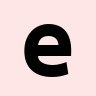

In [8]:
ims[0]

In [13]:
from einops import reduce, rearrange, repeat

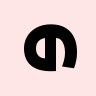

In [14]:
rearrange(ims[0], 'h w c -> w h c')

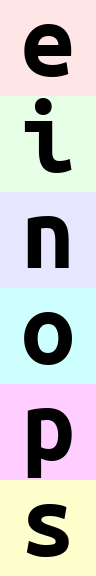

In [17]:
rearrange(ims, 'b h w c -> (b h) w c')

In [25]:
ims.shape, rearrange(ims, 'b h w c -> (b h) w c').shape, rearrange(ims, 'b h w c -> h (b w) c').shape

((6, 96, 96, 3), (576, 96, 3), (96, 576, 3))

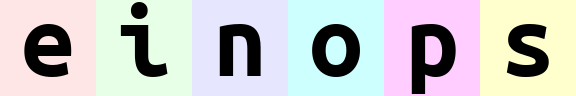

In [20]:
rearrange(ims, 'b h w c -> h (b w) c')

In [28]:
rearrange(ims, 'b h w c -> (b h w c)').shape

(165888,)

### Decomposition of axis

In [29]:
rearrange(ims,'(b1 b2)h w c -> b1 b2 h w c',b1=2)

<array of shape (2, 3, 96, 96, 3)>


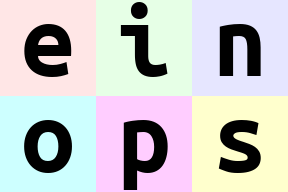

In [30]:
rearrange(ims,'(b1 b2)h w c -> (b1 h) (b2 w) c',b1=2)

In [31]:
rearrange(ims,'(b1 b2)h w c -> (b1 h) (b2 w) c',b1=2).shape

(192, 288, 3)

In [37]:
import torch
# What a 4x3x2x1 means is that we'll have 4 matrices of 3x2x1 shape, aka we'll have 4 matrices where each matrix contains 3 matrices of 2x1 shape
x = torch.rand(4,3,2,1)
x

tensor([[[[0.5604],
          [0.5089]],

         [[0.6142],
          [0.3528]],

         [[0.9541],
          [0.8407]]],


        [[[0.2751],
          [0.1381]],

         [[0.2287],
          [0.8387]],

         [[0.9555],
          [0.4719]]],


        [[[0.8867],
          [0.0598]],

         [[0.8229],
          [0.3753]],

         [[0.0371],
          [0.9284]]],


        [[[0.3797],
          [0.0896]],

         [[0.6839],
          [0.2878]],

         [[0.4566],
          [0.9567]]]])

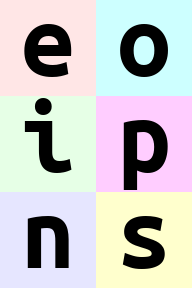

In [38]:
rearrange(ims,'(b1 b2)h w c -> (b2 h) (b1 w) c',b1=2)

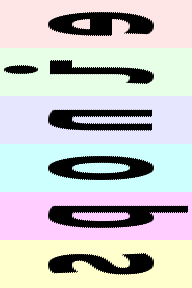

In [44]:
rearrange(ims,'b h (w1 w2) c -> (b w1) (h w2) c',w1=48)

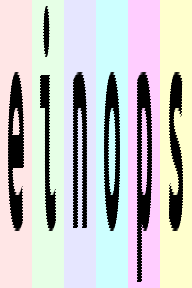

In [50]:
rearrange(ims, 'b h (w1 w2) c -> (h w2) (b w1) c',w2=3)

### Order of axes matters

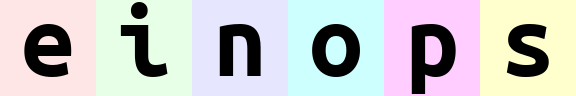

In [51]:
rearrange(ims, 'b h w c -> h (b w) c')